In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
import os, time
import math
import warnings
warnings.filterwarnings('ignore')
import polcal_lib as pln
import importlib as imp
import numpy as np
from matplotlib import pyplot as plt
import polcal as pln_cnn
from tqdm import tqdm

In [32]:
print(os.path.join(os.getcwd()))

/Users/dorozco/Dropbox (IdAdA)/Python/polcal_NN


In [33]:
imp.reload(pln)

<module 'polcal_lib' from '/Users/dorozco/Dropbox (IdAdA)/Python/polcal_NN/polcal_lib.py'>

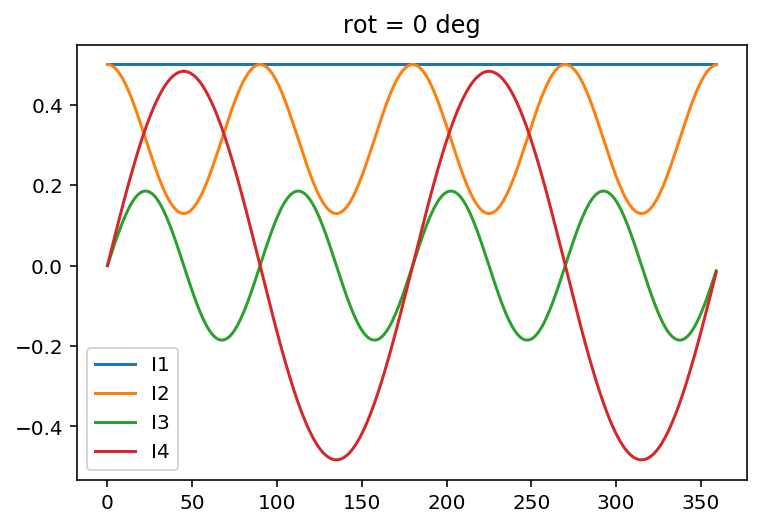

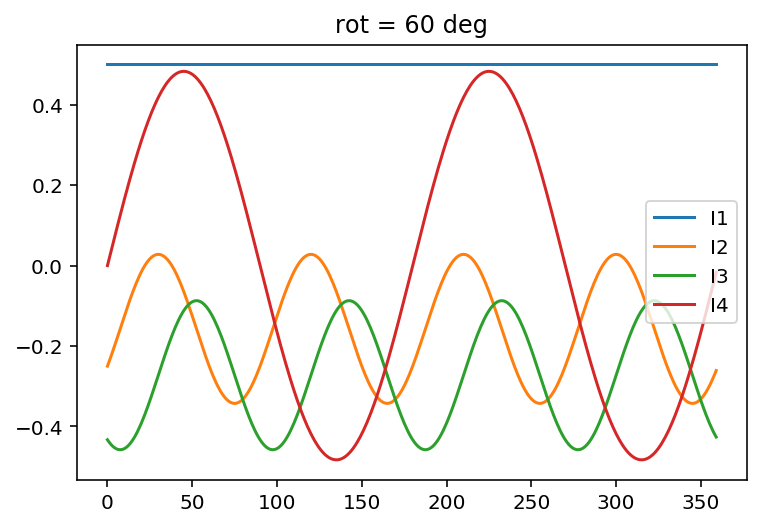

In [34]:
#test cl unit
cl = pln.cal_unit(0., 75., 90., angle_rot=None)
cl
pln.test_cal_unit()

[[ 5.00000000e-01 -4.70755555e-01 -2.99864502e-01  8.55050358e-02]
 [-5.00000000e-01  4.70755555e-01  2.99864502e-01 -8.55050358e-02]
 [ 6.12323400e-17 -5.76509284e-17 -3.67228103e-17  1.04713468e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[[ 0.5         0.47075556  0.2998645  -0.08550504]
 [ 0.5         0.47075556  0.2998645  -0.08550504]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


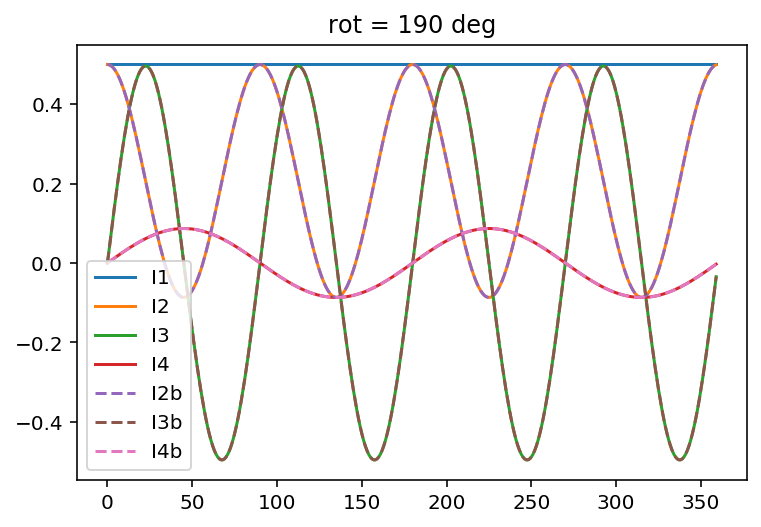

In [35]:
imp.reload(pln)
print(np.matmul(pln.pol_lin(90),
                pln.rotating_wp(10, 150)))
print(np.matmul(pln.pol_lin(0),
                pln.rotating_wp(10, 150)))
pln.test_rotating_wp(retardance=190)


(360,)

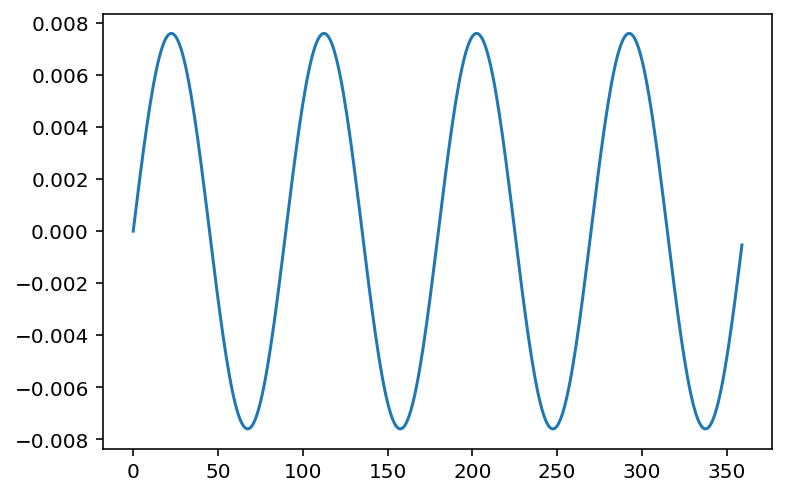

In [36]:
theta = np.arange(0,360,1)
retardance = 10
ana = np.cos(2*theta*np.pi/180.)*np.sin(2*theta*np.pi/180.)*(1-np.cos(retardance*np.pi/180))
plt.plot(ana)
theta.shape

In [37]:
LCVRM = np.zeros((4, 4),dtype=np.float64)
LCVRM

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [38]:
imp.reload(pln)
print(pln.pol_model(angle_rot=7)*2)

[[ 1.         -0.7087197   0.41287061  0.5720614 ]
 [ 1.         -0.42045856 -0.69988938 -0.57738155]
 [ 1.          0.69982104 -0.42057231  0.57738155]
 [ 1.          0.42045856  0.69988938 -0.57738155]]


In [39]:
imp.reload(pln)
pln.pardata['pol_angle']=90
pardata = {'delta1' : np.array([225, 225, 315, 315]),
            'delta2' : np.array([234, 125.26, 54.74, 305.26]),
            'theta1' : 0,
            'theta2' : 45,
            'pol_angle' : 0,
            'rot_inst' : 0}

a,b=pln.pol_cal_model(pardata=pardata)
a

array([[ 1.        , -0.58778525,  0.5720614 ,  0.5720614 ],
       [ 1.        , -0.57728771, -0.57738155, -0.57738155],
       [ 1.        ,  0.57728771, -0.57738155,  0.57738155],
       [ 1.        ,  0.57728771,  0.57738155, -0.57738155]])

In [43]:
ld = np.load('trainning_data.npz')
a = ld['a']
b = ld['b']
c = ld['n_samples']

In [179]:
#mi modelo es un random
imp.reload(pln)
n_samples = 50000
imp.reload(pln)
a,b = pln.random_model(sample=n_samples,theta=np.arange(0, 360, 10))

100%|██████████| 50000/50000 [03:03<00:00, 272.53it/s]


'random_model'  183.48 seconds


In [180]:
#save training data
np.savez('trainning_data', a=a, b=b,n_samples=n_samples)

(50000, 36, 4)
(50000, 4, 4)


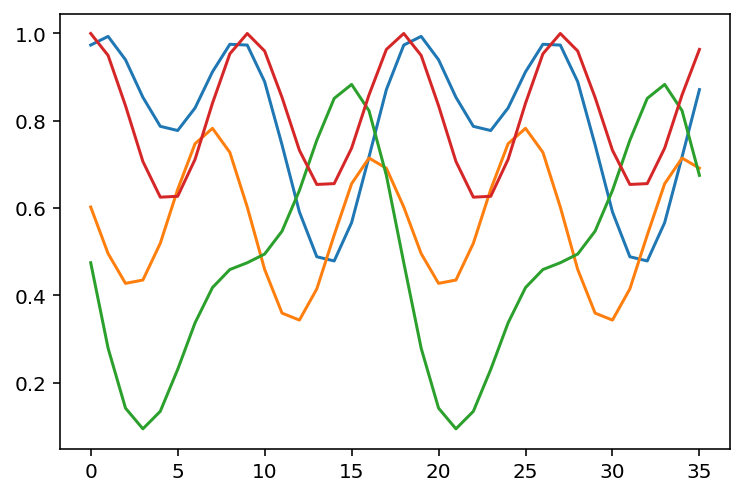

In [44]:
print(a.shape)
print(b.shape)
plt.plot(a[3,:,0])
plt.plot(a[3,:,1])
plt.plot(a[3,:,2])
plt.plot(a[3,:,3])
plt.show()

# NN configuration
Number of Layer: 5 

Activation Fuction: ReLU (PON VALORES DEL PAPER DE RICARDO)

Droupout Rate: 0.5 for 1st Layer and 0.4 for the rest four Layer

Learning Rate: 0.005

Weight Regularizer: None

Optimization Method: Adam

Number of Batch: 128

Number of epoch: 50

144 16
Start training.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s 499us/step - loss: 0.0108 - mean_squared_error: 0.0244 - val_loss: 4.9502e-04 - val_mean_squared_error: 0.0012
Epoch 2/10
40000/40000 [==============================] - 18s 438us/step - loss: 0.0018 - mean_squared_error: 0.0046 - val_loss: 4.0925e-04 - val_mean_squared_error: 0.0010
Epoch 3/10
40000/40000 [==============================] - 21s 518us/step - loss: 0.0016 - mean_squared_error: 0.0040 - val_loss: 2.7125e-04 - val_mean_squared_error: 6.4207e-04
Epoch 4/10
40000/40000 [==============================] - 17s 425us/step - loss: 0.0015 - mean_squared_error: 0.0037 - val_loss: 2.5731e-04 - val_mean_squared_error: 6.0695e-04
Epoch 5/10
40000/40000 [==============================] - 20s 495us/step - loss: 0.00

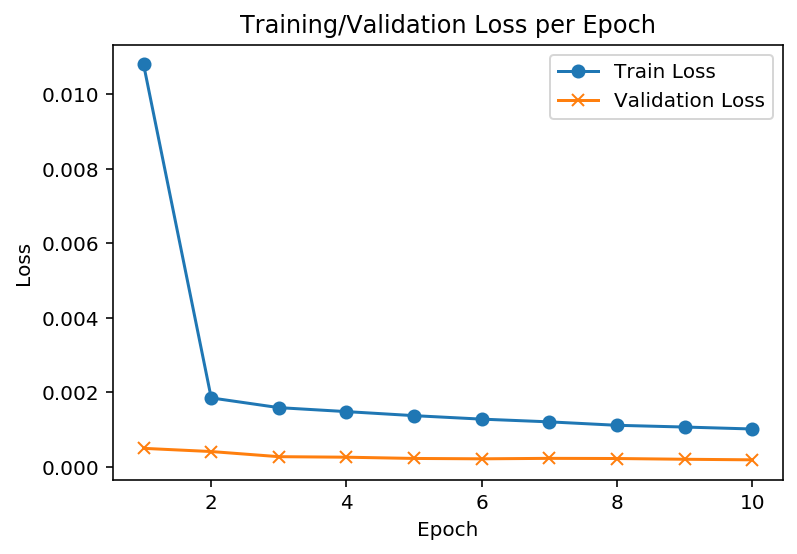

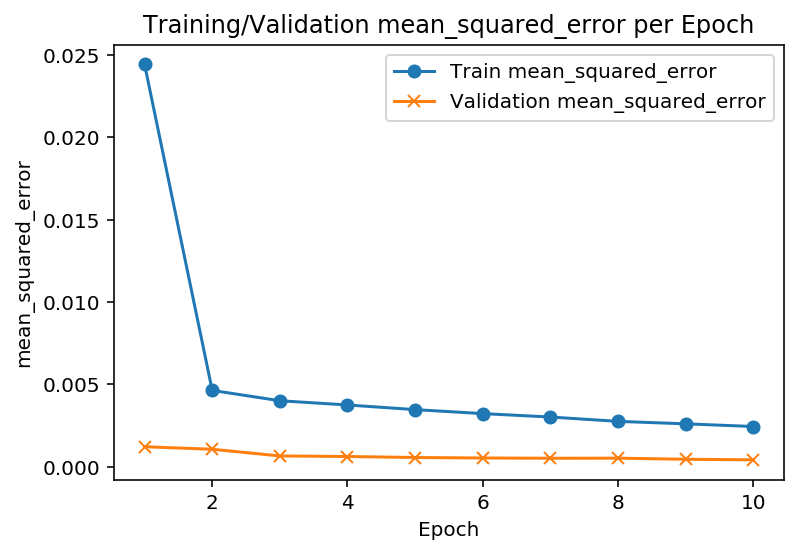

In [46]:
#train de CNN
n_samples = 50000
imp.reload(pln_cnn)
data_out = (np.reshape(b,(n_samples,4*4))+1)/2.
data_in = np.reshape(a,(n_samples,36,4))
model, history = pln_cnn.TrainModel(data_in,data_out,epochs=10,batch_size=128)#128
pln_cnn.PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
pln_cnn.PlotHistory(history.history['mean_squared_error'], history.history['val_mean_squared_error'], 'mean_squared_error')
#pln_cnn.drawWeightHistogram(model)
test_score = pln_cnn.TestModel(model=model, data_in=data_in,data_out=data_out)

In [47]:
np.savez('trainning_model', model=model, history=history)

In [48]:
imp.reload(pln_cnn)
test_score = pln_cnn.TestModel(model=model, data_in=data_in,data_out=data_out)

50000/50000 [==============================] - 10s 199us/step
[0.00018627539127133785, 0.000403956159343943]
-----------------------------
Test loss 0.0002, accuracy 0.04%
-----------------------------


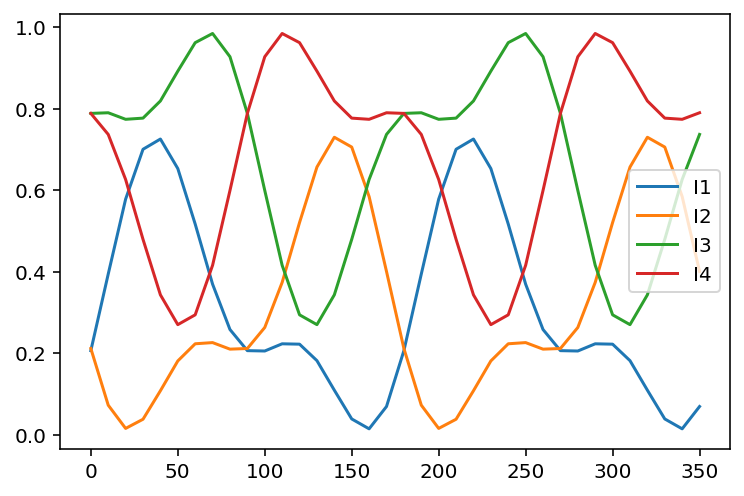

[[ 1.0010381  -0.552791    0.5422485   0.45237672]
 [ 1.0061023  -0.57136047 -0.6311809  -0.5885805 ]
 [ 0.99701023  0.60674775 -0.516826    0.59501743]
 [ 0.99568665  0.5754651   0.5811819  -0.5701232 ]]
[[ 1.         -0.58778525  0.5720614   0.5720614 ]
 [ 1.         -0.57728771 -0.57738155 -0.57738155]
 [ 1.          0.57728771 -0.57738155  0.57738155]
 [ 1.          0.57728771  0.57738155 -0.57738155]]


In [49]:
imp.reload(pln_cnn)
imp.reload(pln)
pln.pardata = {'delta1' : np.array([225, 225, 315, 315]),
            'delta2' : np.array([234, 125.26, 54.74, 305.26]),
            'theta1' : 0,
            'theta2' : 45,
            'pol_angle' : 90,
            'rot_inst' : 0}
res,data = pln.pol_cal_model(pardata=pardata,plot='yes',theta=np.arange(0, 360, 10))
data = np.reshape(data,(1,36,4))
result = pln_cnn.model_synthesize(model,data)
result = np.reshape(result,(1,4,4))
print(result[0,:,:]*2-1)
print(res[:,:])
#data = (np.reshape(np.tile(np.reshape(data,360*4), 100),(100,360,4))+1)/2.
#result = pln_cnn.model_synthesize(model,data)
#result = np.reshape(result,(100,4,4))
#print(result[0,:,:])
#print(res[:,:])

# comparar datos y luego con el metodo clasico
TENGO QUE HACER UN MODELO PARA PHI!!!!

In [57]:
from scipy.io.idl import readsav
file = '/Volumes/New Volume/PHI_WORK/PHI_POLCAL/datos_FDT_40D_J0.sav'
s = readsav(file)
data = s.data
data = np.einsum('klij->ijkl', data)

(2048, 2048, 36, 4)


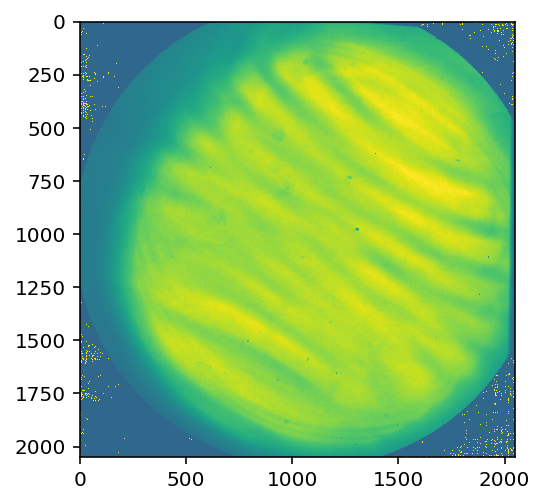

In [58]:
plt.imshow(data[:,:,0,0]/np.max(data[500:1500,500:1500,0,0]),vmin=-0.5,vmax=1)
print(data.shape)
norma = np.max(data[500:1500,500:1500,:,:])
data = data/norma

In [59]:
data = np.reshape(data,(2048*2048,36,4))

In [60]:
imp.reload(pln_cnn)
result = pln_cnn.model_synthesize(model,data)
result = np.reshape(result,(2048,2048,4,4))

4194304/4194304 [==============================] - 532s 127us/step


[[ 0.93255436 -0.8915355  -0.13618374 -0.08472794]
 [ 0.92887235 -0.985945   -0.1476633  -0.02284259]
 [ 0.9394038  -0.8830779  -0.02267849 -0.02343488]
 [ 0.9268426  -0.8811923  -0.13652062 -0.11888736]]


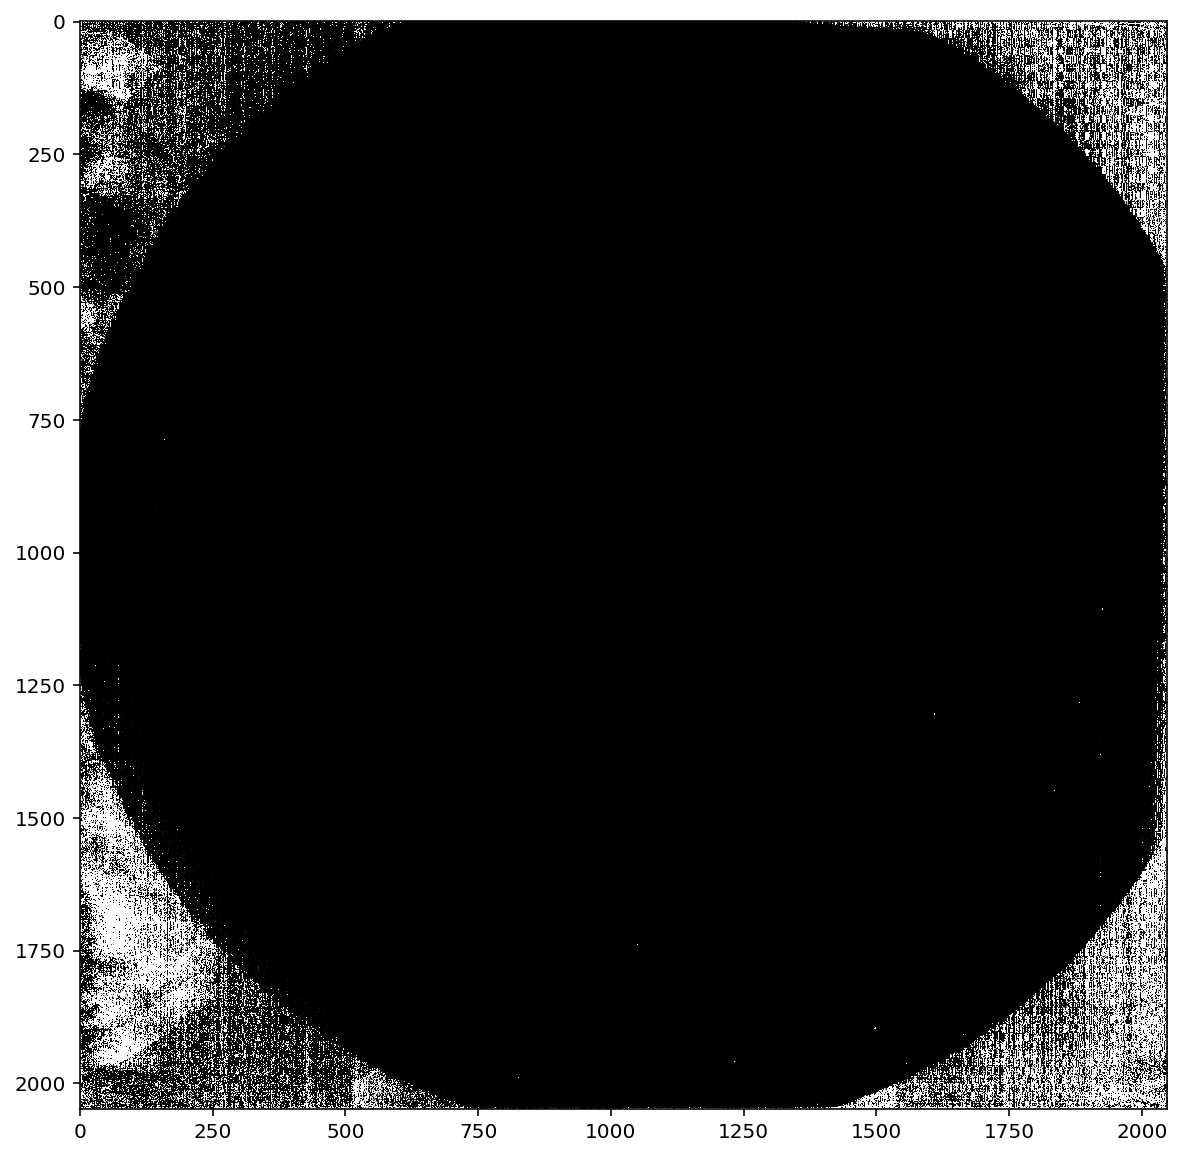

In [81]:
result=result*2-1
plt.figure(figsize=(10,10))
ix = 1
iy = 2
lim_s = np.max(result[500:1500,500:1500,ix,iy])
lim_i = np.min(result[500:1500,500:1500,ix,iy])
plt.imshow(result[:,:,ix,iy],vmin=lim_i,vmax=lim_s,cmap='gray')
print(result[1000,1000,:,:])

# 2D empieza aqui

In [10]:
#2D
imp.reload(pln_cnn)
imp.reload(pln)
dat = np.load('trainning_data.npz')
data_in=dat['a']
data_out=dat['b']
print(data_in.shape)
print(data_out.shape)

(50000, 36, 4)
(50000, 4, 4)


In [11]:
data_in = np.reshape(data_in,(50000,36*4))
data_out = np.reshape(data_out,(50000,4*4))
#data_in = data_in[0:1000,:]
#data_out = data_out[0:1000,:]

In [5]:
data_in_training = np.zeros((500,64,64,36*4))
data_out_training = np.zeros((500,64*64*4*4))
for i in tqdm(range(500)):
    data_in_training[i,:,:,:] = np.broadcast_to(data_in[i,:], (64, 64, 36*4))
    data_out_training[i,:] = (np.broadcast_to(data_out[i,:], (64, 64, 16)).flatten()+1)/2.

100%|██████████| 500/500 [00:08<00:00, 60.42it/s]


In [23]:
data_out_training = (np.broadcast_to(data_out[0:500,:], (64, 64, 500,16))+1)/2.
data_out_training = np.einsum('ijkl->kijl', data_out_training)
data_out_training = np.reshape(data_out_training,(500,64*64*16))
data_in_training = np.broadcast_to(data_in[0:500,:], (64, 64, 500,36*4))
data_in_training = np.einsum('ijkl->kijl', data_in_training)

2d
2d
589824 65536
Start training.
Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0840 - mean_squared_error: 0.2021 - val_loss: 0.0880 - val_mean_squared_error: 0.2041
Epoch 2/20
400/400 [==============================] - 21s 52ms/step - loss: 0.0460 - mean_squared_error: 0.0979 - val_loss: 0.0759 - val_mean_squared_error: 0.1772
Epoch 3/20
400/400 [==============================] - 23s 57ms/step - loss: 0.0419 - mean_squared_error: 0.0881 - val_loss: 0.0744 - val_mean_squared_error: 0.1743
Epoch 4/20
400/400 [==============================] - 21s 53ms/step - loss: 0.0392 - mean_squared_error: 0.0822 - val_loss: 0.0741 - val_mean_squared_error: 0.1741
Epoch 5/20
400/400 [==============================] - 21s 51ms/step - loss: 0.0372 - mean_squared_error: 0.07

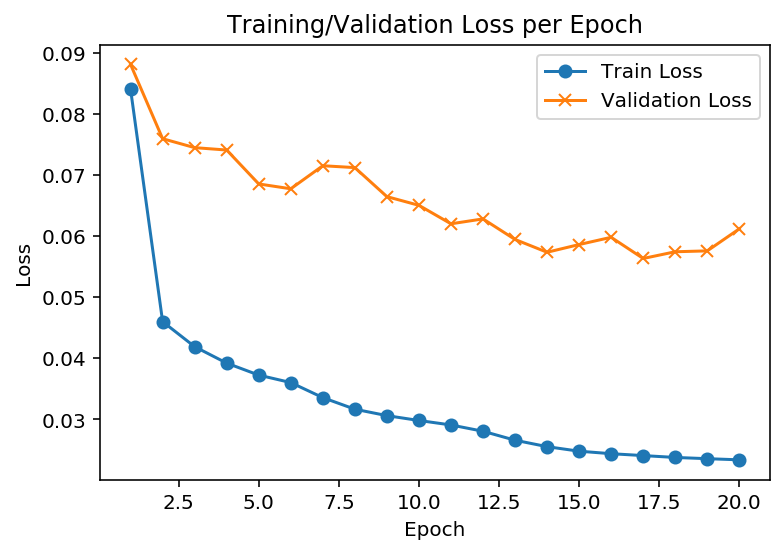

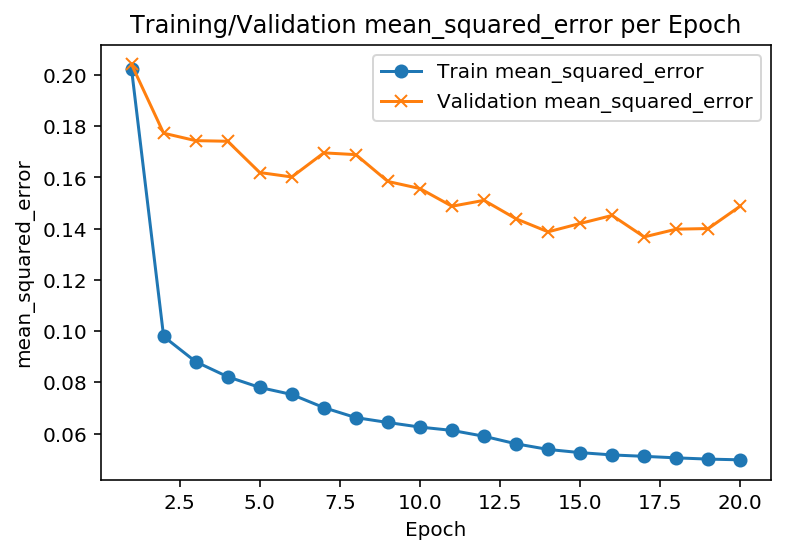

In [29]:
imp.reload(pln_cnn)
model, history = pln_cnn.TrainModel(data_in_training,data_out_training,epochs=20,batch_size=16,dimen=2)#128
pln_cnn.PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
pln_cnn.PlotHistory(history.history['mean_squared_error'], history.history['val_mean_squared_error'], 'mean_squared_error')
test_score = pln_cnn.TestModel(model=model, data_in=data_in_training,data_out=data_out_training)
print('-------------------------saving the model-------------------------')
model.save('trainning_model_2d')

Train on 400 samples, validate on 100 samples
Epoch 1/2
400/400 [==============================] - 21s 52ms/step - loss: 0.0560 - mean_squared_error: 0.1145 - val_loss: 0.0507 - val_mean_squared_error: 0.1043

Epoch 00001: loss improved from inf to 0.05599, saving model to trainning_model_2d
Epoch 2/2
400/400 [==============================] - 21s 53ms/step - loss: 0.0474 - mean_squared_error: 0.0976 - val_loss: 0.0446 - val_mean_squared_error: 0.0921

Epoch 00002: loss improved from 0.05599 to 0.04740, saving model to trainning_model_2d


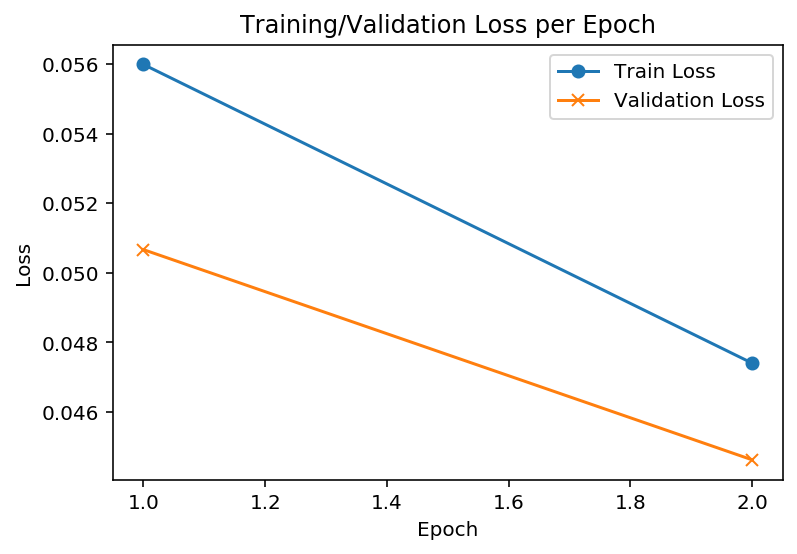

In [26]:
checkpoint = pln_cnn.ModelCheckpoint('trainning_model_2d', monitor='loss', verbose=1,save_best_only=True, mode='min')
callbacks_list = [checkpoint] 
data_out_training = (np.broadcast_to(data_out[500:1000,:], (64, 64, 500,16))+1)/2.
data_out_training = np.einsum('ijkl->kijl', data_out_training)
data_out_training = np.reshape(data_out_training,(500,64*64*16))
data_in_training = np.broadcast_to(data_in[500:1000,:], (64, 64, 500,36*4))
data_in_training = np.einsum('ijkl->kijl', data_in_training)
history = model.fit(data_in_training, data_out_training, batch_size=16,
                            epochs=2, verbose=1, validation_split=0.2, callbacks=callbacks_list)
pln_cnn.PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')

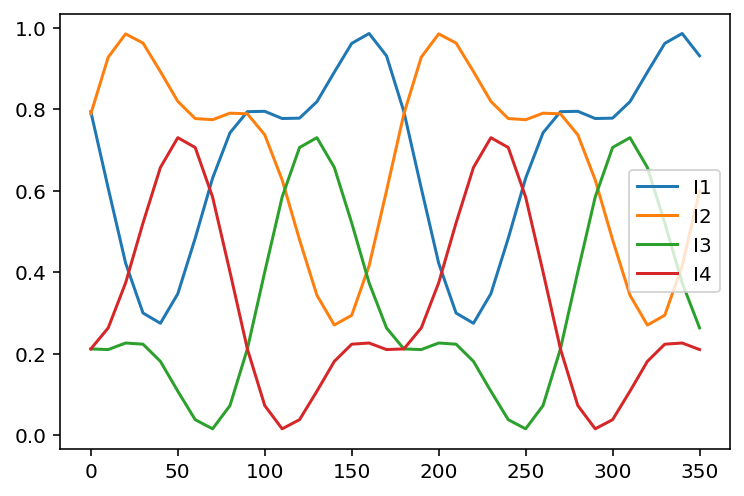

[[ 0.9494628  -1.          0.06178355  0.01741374]
 [ 0.91594553 -0.21249837 -0.05065668 -0.00865173]
 [ 0.9523678  -0.40354902 -0.18806094 -0.07438022]
 [ 0.9559971   0.03607535 -0.04860103  0.18664491]]
[[ 1.          0.58778525 -0.5720614  -0.5720614 ]
 [ 1.          0.57728771  0.57738155  0.57738155]
 [ 1.         -0.57728771  0.57738155 -0.57738155]
 [ 1.         -0.57728771 -0.57738155  0.57738155]]


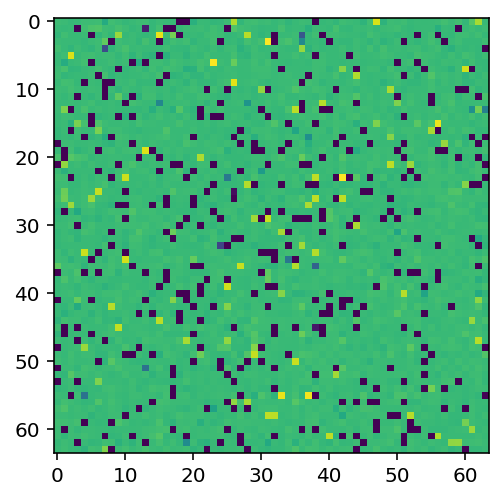

In [28]:
pardata = {'delta1' : np.array([225, 225, 315, 315]),
            'delta2' : np.array([234, 125.26, 54.74, 305.26]),
            'theta1' : 0,
            'theta2' : 45,
            'pol_angle' : 90,
            'rot_inst' : 0}
res,data = pln.pol_cal_model(pardata=pardata,plot='yes',theta=np.arange(0, 360, 10))
data_in_test = np.broadcast_to(data.flatten(), (1,64, 64, 36*4))
result = pln_cnn.model_synthesize(model,data_in_test)
result = np.reshape(result,(64, 64,4,4))*2-1
plt.imshow(result[:,:,0,0])
print(result[0,0,:,:])
print(res)

In [56]:
from scipy.io.idl import readsav
file = '/Volumes/New Volume/PHI_WORK/PHI_POLCAL/datos_FDT_40D_J0.sav'
s = readsav(file)
data = s.data

In [79]:
data = np.einsum('klij->ijkl', data)

(2048, 2048, 36, 4)


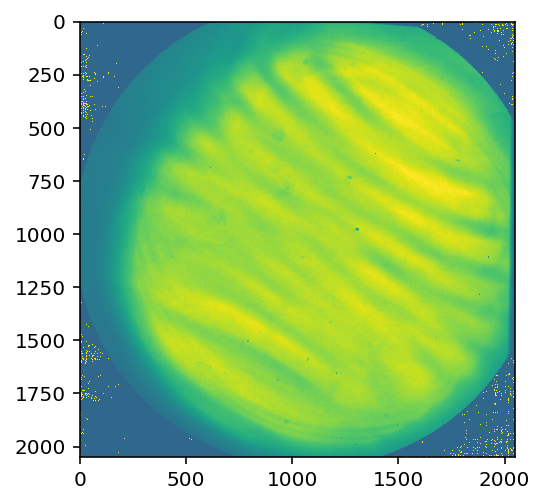

In [80]:
plt.imshow(data[:,:,0,0]/np.max(data[500:1500,500:1500,0,0]),vmin=-0.5,vmax=1)
print(data.shape)

364080.0


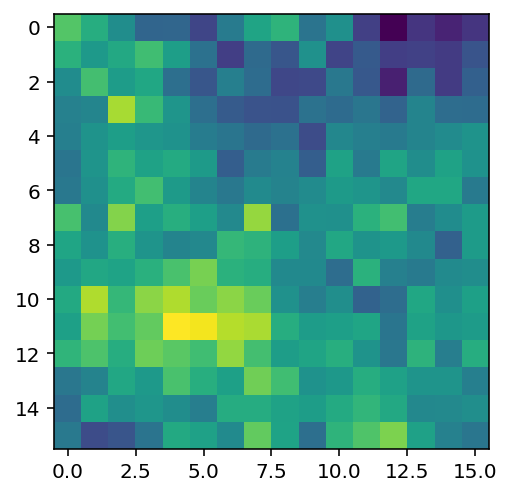

In [91]:
data_in_test = np.reshape(data[1000:1016,1000:1016,:,:], (1,16,16,36*4))
norma = np.max(data_in_test)
data_in_test = data_in_test/norma
plt.imshow(data_in_test[0,:,:,0])
print(norma)

[[ 0.64112794 -0.6555759  -0.49928296  0.31503022]
 [ 0.6361579   0.21996057 -0.825342   -0.6290996 ]
 [ 0.73834574  0.19028354  0.33205318  0.6799339 ]
 [ 0.66665256 -0.39148742  0.5296134  -0.3274653 ]]
[[ 1.         -0.58778525  0.5720614   0.5720614 ]
 [ 1.         -0.57728771 -0.57738155 -0.57738155]
 [ 1.          0.57728771 -0.57738155  0.57738155]
 [ 1.          0.57728771  0.57738155 -0.57738155]]


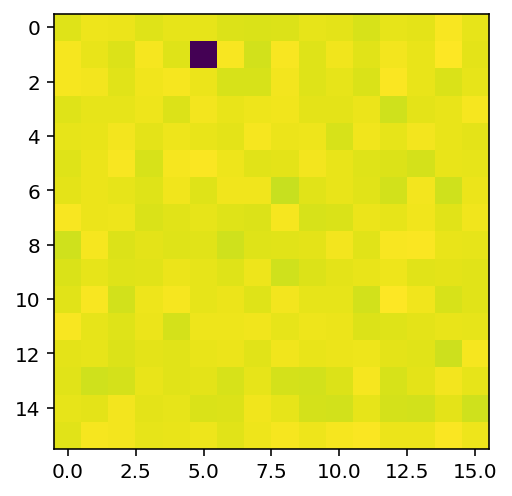

In [106]:
result = pln_cnn.model_synthesize(model,data_in_test)
result = np.reshape(result,(16,16,4,4))*2-1
plt.imshow(result[:,:,0,0])
print(result[0,0,:,:])
print(res)

In [109]:
#PREPARE FULL DATA (tarda 1 min)
#normaliza y reorganiza
data_in_test = np.reshape(data, (2048,2048,36*4))
norma = np.max(data_in_test[500:1500,500:1500,:])
data_in_test = data_in_test/norma

#Pone para la NN
a, b, c = 2048, 2048, 36*4
aa, bb = 16, 16
arr = np.arange(a*b*c).reshape(a, b, c)
data_in_test = data_in_test.reshape(a//aa, aa, b//bb, bb, c)
data_in_test = np.einsum('nklij->nlkij', data_in_test)
data_in_test = np.reshape(data_in_test, (128*128, 16, 16, 36*4))

In [112]:
data_in_test.shape

(16384, 16, 16, 144)

In [120]:
result = pln_cnn.model_synthesize(model,data_in_test)

In [121]:
result.shape
resulto = np.copy(result)

In [165]:
resulto.shape
test = np.reshape(resulto[64*64,:],(16,16,4,4))*2-1
print(test[10,5,:,:])

[[ 1.0835516  -0.42832768  0.0719372   0.10847557]
 [ 1.0166514   0.37957382 -0.7409792  -0.45620096]
 [ 1.1140609  -0.20820302  0.42221856  1.2430503 ]
 [ 1.1406748   0.54790914  0.6240592  -0.29861438]]


In [171]:
print(np.arange(0,2048,16))

[   0   16   32   48   64   80   96  112  128  144  160  176  192  208
  224  240  256  272  288  304  320  336  352  368  384  400  416  432
  448  464  480  496  512  528  544  560  576  592  608  624  640  656
  672  688  704  720  736  752  768  784  800  816  832  848  864  880
  896  912  928  944  960  976  992 1008 1024 1040 1056 1072 1088 1104
 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328
 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552
 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776
 1792 1808 1824 1840 1856 1872 1888 1904 1920 1936 1952 1968 1984 2000
 2016 2032]


In [175]:
result=resulto
result = np.reshape(result,(int(2048/16)*int(2048/16),16,16,4,4))*2-1
final = np.zeros((2048,2048,4,4))
for i in np.arange(0,2048,16):
    for j in np.arange(0,2048,16):
        final[i:i+16,j:j+16,:,:] = result[int(i/16)*int(j/16),:,:,:,:]
#result = np.einsum('nlkij->nklij', result)
#result = result.reshape(a, b, 16)
result.shape
final.shape

(2048, 2048, 4, 4)

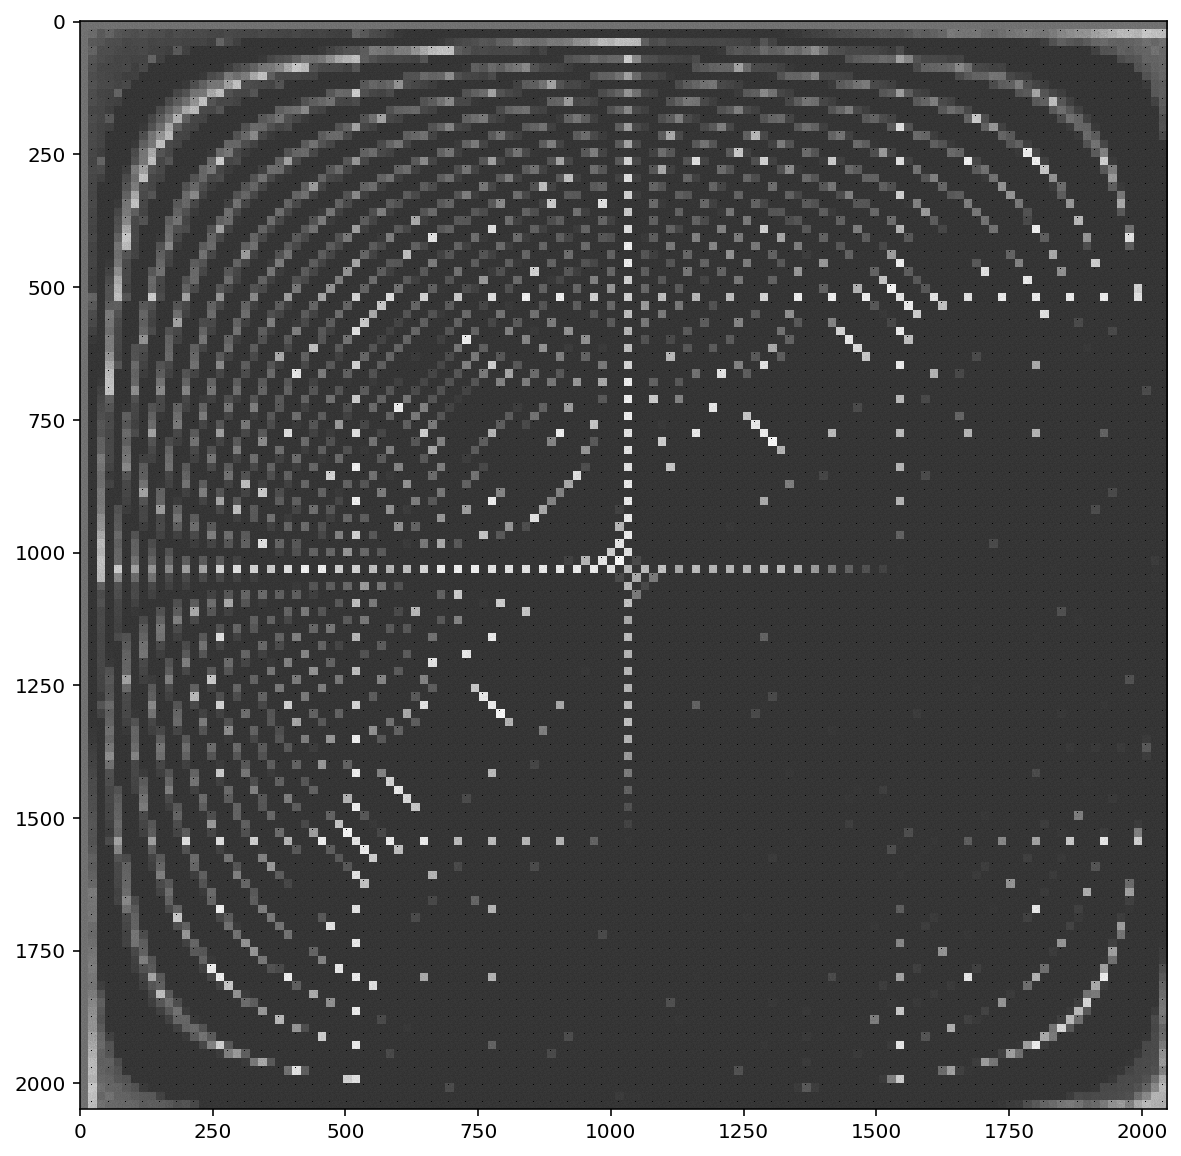

In [178]:
plt.figure(figsize=(10,10))
ix = 0
iy = 0
lim_s = np.max(final[500:1500,500:1500,ix,iy])
lim_i = np.min(final[500:1500,500:1500,ix,iy])
plt.imshow(final[:,:,ix,iy],vmin=lim_i,vmax=lim_s,cmap='gray')
